# Autó klasszifikálása 64x64-es képeken
## Adatbázis: http://www.gti.ssr.upm.es/data/Vehicle_database.html

In [1]:
# Felhasznált lib-ek importálása
%matplotlib inline
import glob 
import numpy as np
import cv2
print("OpenCV Version : %s " % cv2.__version__)
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Lambda
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils 
from keras.utils import plot_model 

import random

OpenCV Version : 3.3.0 


/home/atig/Programs/Anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Autó db: 8792
Nem Autó db: 8968
Összesen db: 17760
(17760, 64, 64, 3)


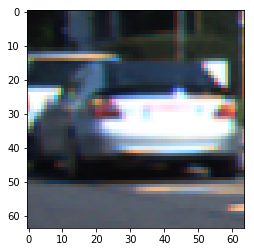

[1 0]


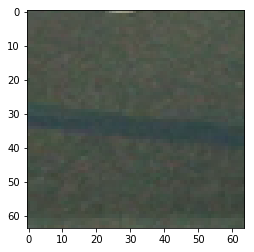

[0 1]


In [12]:
# Adatábzis betöltése
raw_data_car = glob.glob("./Database/vehicles/*/*.png")
raw_data_non_car = glob.glob("./Database/non-vehicles/*/*.png")

# Adatbázis mérete
print("Autó db: " + str(len(raw_data_car)))
print("Nem Autó db: " + str(len(raw_data_non_car)))
print("Összesen db: " + str(len(raw_data_car) + len(raw_data_non_car)))

all_data_input = []
all_data_output = []
all_data_output2 = []

# Képek betöltése
for pic in raw_data_car:   
    all_data_input.append(cv2.cvtColor(cv2.imread(pic), cv2.COLOR_BGR2RGB))
    all_data_output.append((1,0))
for pic in raw_data_non_car: 
    all_data_input.append(cv2.cvtColor(cv2.imread(pic), cv2.COLOR_BGR2RGB))
    all_data_output.append((0,1))
        
#Összes kép
all_data_input = np.array(all_data_input)
all_data_output = np.array(all_data_output)

print(all_data_input.shape)

plt.imshow(all_data_input[0])
plt.show()
print(all_data_output[0])
plt.imshow(all_data_input[10001])
plt.show()
print(all_data_output[10001])

Tanító adatok be : (15984, 64, 64, 3)
Tanító adatok ki: (15984, 2)
Tesztelő adatok be: (1775, 64, 64, 3)
Tesztelő adatok ki: (1775, 2)
tanító be:  (15984, 64, 64, 3)
tanító ki (15984, 2)
teszt be (1775, 64, 64, 3)
teszt ki (1775, 2)


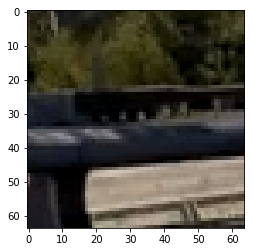

[0 1]


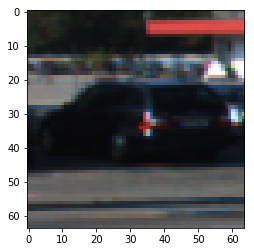

[1 0]


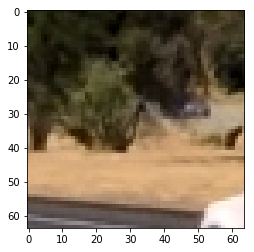

[0 1]


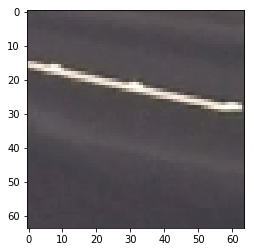

[0 1]


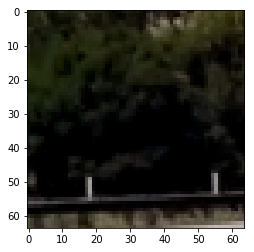

[0 1]


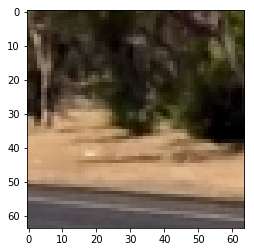

[0 1]


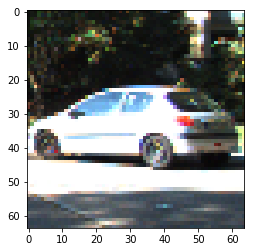

[1 0]


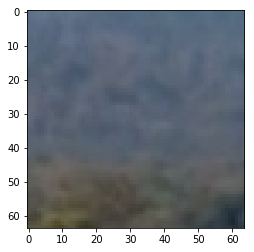

[0 1]


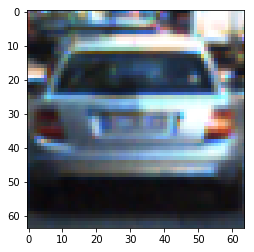

[1 0]


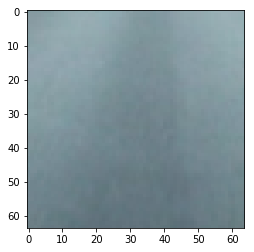

[0 1]


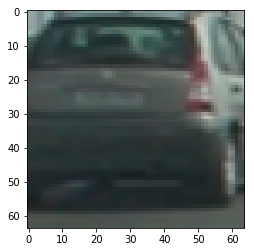

[1 0]


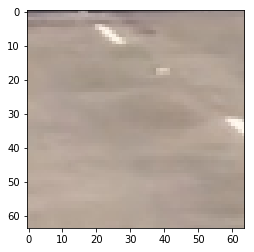

[0 1]


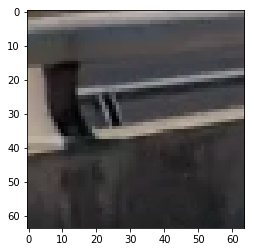

[0 1]


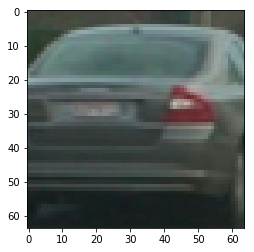

[1 0]


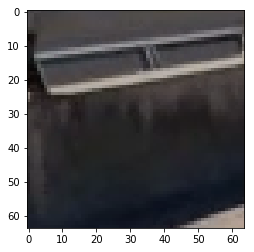

[0 1]


In [13]:
#Megkeverjük az adatokat
shuffle_pack = list(zip(all_data_input, all_data_output))
random.shuffle(shuffle_pack)

shuffled_data_input, shuffled_data_output = zip(*shuffle_pack)

shuffled_data_input = np.array(shuffled_data_input)
shuffled_data_output = np.array(shuffled_data_output)

data_samples = shuffled_data_input.shape[0]
train_samples = int(shuffled_data_input.shape[0] * 0.9)
test_samples = data_samples - train_samples

train_data_input = shuffled_data_input[0:train_samples][:][:]
train_data_output = shuffled_data_output[0:train_samples][:][:]

test_data_input = shuffled_data_input[train_samples:data_samples-1][:][:]
test_data_output = shuffled_data_output[train_samples:data_samples-1][:][:]

print("Tanító adatok be : " +  str(train_data_input.shape))
print("Tanító adatok ki: " +  str(train_data_output.shape))
print("Tesztelő adatok be: " +str(test_data_input.shape))
print("Tesztelő adatok ki: " +str(test_data_output.shape))

#A képek megváltoztak

print("tanító be: " , train_data_input.shape)
print("tanító ki" , train_data_output.shape)
print("teszt be" , test_data_input.shape)
print("teszt ki" , test_data_output.shape)

for i in range(0,15000,1000):
    plt.imshow(train_data_input[i])
    plt.show()
    print(train_data_output[i])


input_shape =  (64,64,3)

In [14]:
def build_conv_model(input_shape = (64,64,3), filename="weights.h5"):
    
    # Modell létrehozása
    model = Sequential()
    model.add(Conv2D(4, (2, 2), input_shape=input_shape, padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(8, (2, 2), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(16, (2, 2), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(32, (2, 2), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
     
    return model

In [15]:
model = build_conv_model(input_shape)
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 4)         52        
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 8)         136       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        528       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
__________

In [19]:
# Tanítás
model.fit(train_data_input, 
          train_data_output, 
          batch_size=256, 
          epochs=50, 
          verbose=1, 
          validation_data=(test_data_input, test_data_output))

# Tesztelés
score = model.evaluate(test_data_input, test_data_output, verbose=0)
print(model.metrics_names[0] , ' - ', score[0])
print(model.metrics_names[1] , ' - ', score[1])

# Modell és súlyok mentése
model.save("model.h5")
model.save_weights("weights.h5")

Train on 15984 samples, validate on 1775 samples
Epoch 1/50
15984/15984 [==============================] - 23s 1ms/step - loss: 0.1159 - acc: 0.8446 - val_loss: 0.1053 - val_acc: 0.8642
Epoch 2/50
15984/15984 [==============================] - 24s 2ms/step - loss: 0.1135 - acc: 0.8498 - val_loss: 0.1088 - val_acc: 0.8558
Epoch 3/50
15984/15984 [==============================] - 25s 2ms/step - loss: 0.1129 - acc: 0.8522 - val_loss: 0.1094 - val_acc: 0.8665
Epoch 4/50
15984/15984 [==============================] - 25s 2ms/step - loss: 0.1125 - acc: 0.8547 - val_loss: 0.1042 - val_acc: 0.8648
Epoch 5/50
15984/15984 [==============================] - 24s 1ms/step - loss: 0.1091 - acc: 0.8560 - val_loss: 0.1048 - val_acc: 0.8637
Epoch 6/50
15984/15984 [==============================] - 24s 2ms/step - loss: 0.1096 - acc: 0.8571 - val_loss: 0.1018 - val_acc: 0.8744
Epoch 7/50
15984/15984 [==============================] - 24s 2ms/step - loss: 0.1069 - acc: 0.8617 - val_loss: 0.1025 - val_acc:

## Mély neurális háló mentése Protobuf fájlba

In [20]:
from keras.models import load_model
import tensorflow as tf
import os
import os.path as osp
from keras import backend as K

from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io

In [21]:
weight_file = 'model.h5'
num_output = 1
write_graph_def_ascii_flag = True
prefix_output_node_names_of_final_network = 'output'
output_graph_name = 'car_modell.pb'
output_fld=""

In [22]:
output_fld = 'tensorflow_model/'
if not os.path.isdir(output_fld):
    os.mkdir(output_fld)

In [23]:
K.set_learning_phase(0)
net_model = load_model(weight_file)

pred = [None]*num_output
pred_node_names = [None]*num_output
for i in range(num_output):
    pred_node_names[i] = prefix_output_node_names_of_final_network+str(i)
    pred[i] = tf.identity(net_model.output[i], name=pred_node_names[i])
print('output nodes names are: ', pred_node_names)

output nodes names are:  ['output0']


In [24]:
sess = K.get_session()

if write_graph_def_ascii_flag:
    f = 'only_the_graph_def.pb.ascii'
    tf.train.write_graph(sess.graph.as_graph_def(), output_fld, f, as_text=True)
    print('saved the graph definition in ascii format at: ', osp.join(output_fld, f))

saved the graph definition in ascii format at:  tensorflow_model/only_the_graph_def.pb.ascii


In [25]:
constant_graph = graph_util.convert_variables_to_constants(sess, sess.graph.as_graph_def(), pred_node_names)
graph_io.write_graph(constant_graph, output_fld, output_graph_name, as_text=False)
print('saved the constant graph (ready for inference) at: ', osp.join(output_fld, output_graph_name))

INFO:tensorflow:Froze 12 variables.
Converted 12 variables to const ops.
saved the constant graph (ready for inference) at:  tensorflow_model/car_modell.pb
